In [16]:
# import intake
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
import cmocean.cm as cmo
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator
import gribscan
import intake
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Get the data

In [31]:
#manual way to access data (see catalog below, better approach)

# NEW way with concat files: json file was already prepared with gribscan-index and gribscan-build command line tools
#datapath='/work/bm1344/AWI/nextGEMS_Cycle2_IFS_concat/tco1279-orca025/nemo_deep/varfiles_all/'
#datazarr=datapath+'/json.dir/atm2d.json' # all 2D surface fields, this is the whole dataset!
#data_conc = xr.open_zarr("reference::"+datazarr, consolidated=False)

# this is nemo deep off, no ref in catalogue to compare against
#datapath2='/work/bm1344/AWI/nextGEMS_Cycle2_IFS_concat/tco1279-orca025/nemo/varfiles_all/'
#datazarr2=datapath2+'/json.dir/atm2d.json' # all 2D surface fields, this is the whole dataset!
#data_conc2 = xr.open_zarr("reference::"+datazarr2, consolidated=False)

#  Original data
#datapath='/work/bm1344/AWI/nextGEMS_Cycle2_IFS/tco1279-orca025/nemo_deep/'
#datazarr=datapath+'/json.dir/atm2d.json' # all 2D surface fields, this is the whole dataset!
#data = xr.open_zarr("reference::"+datazarr, consolidated=False)

In [17]:
#reading the updated catalogue:
cat = intake.open_catalog("../catalog.yaml")

In [18]:
print(list(cat['IFS']))

['tco3999-ng5', 'tco2559-ng5', 'tco1279-orca025', 'tco1279-orca025-nodeep', 'tco3999-ng5-delete', 'tco2559-ng5-delete', 'tco1279-orca025-delete']


In [39]:
run = cat.IFS["tco1279-orca025"]
data_conc = run.ICMGG_atm2d.to_dask()
run2 = cat.IFS["tco1279-orca025-delete"]
data = run.ICMGG_atm2d.to_dask()
# and the 1 year 9km deep_off, as well
run3 = cat.IFS["tco1279-orca025-nodeep"]
data_nodeep = run3.ICMGG_atm2d.to_dask()

In [40]:
data_conc.isel(level=1,time=2)['2t'].values[::99999]-data.isel(level=2,time=2)['2t'].values[::99999]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

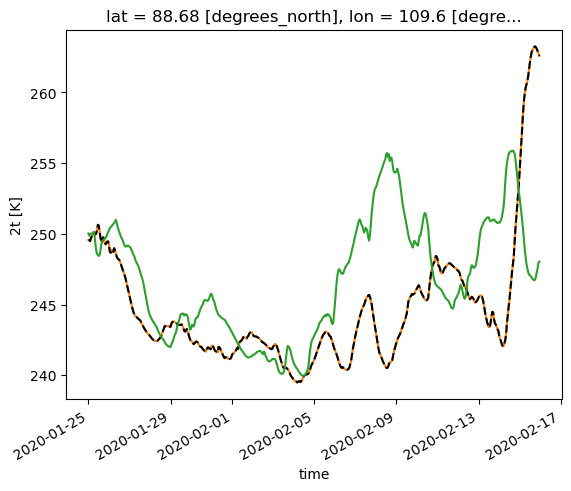

In [22]:
data_conc.sel(time=slice('2020-01-25','2020-02-15')).isel(value=1000)['2t'].plot(c='C1')
data.sel(time=slice('2020-01-25','2020-02-15')).isel(value=1000)['2t'].plot(ls='--',c='k')
data_nodeep.sel(time=slice('2020-01-25','2020-02-15')).isel(value=1000)['2t'].plot(c='C2')

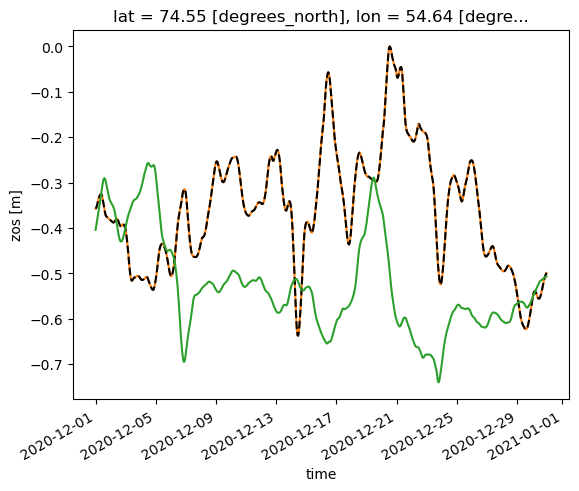

In [25]:
data_conc.sel(time=slice('2020-12-01','2020-12-30')).isel(value=100002)['zos'].plot(c='C1')
data.sel(time=slice('2020-12-01','2020-12-30')).isel(value=100002)['zos'].plot(ls='--',c='k')
data_nodeep.sel(time=slice('2020-12-01','2020-12-30')).isel(value=100000)['zos'].plot(c='C2')

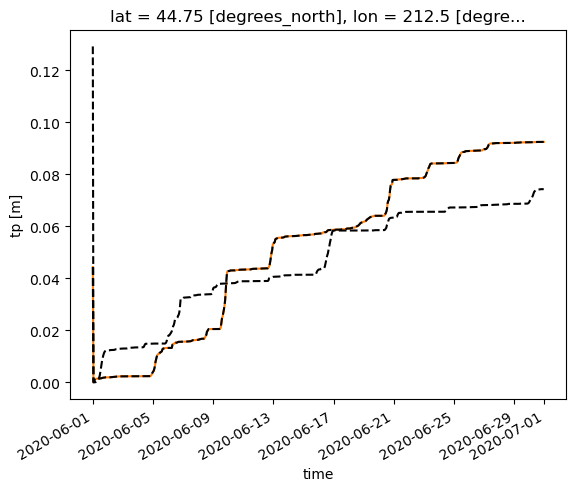

In [26]:
#check an accumulated variable too
data_conc.sel(time=slice('2020-06-01','2020-06-30')).isel(value=840002)['tp'].plot(c='C1')
data.sel(time=slice('2020-06-01','2020-06-30')).isel(value=840002)['tp'].plot(ls='--',c='k')
data_nodeep.sel(time=slice('2020-06-01','2020-06-30')).isel(value=840002)['tp'].plot(ls='--',c='k')

We check 3d data now

In [12]:
# NEW way with concat files: json file was already prepared with gribscan-index and gribscan-build command line tools
#datapath='/work/bm1344/AWI/nextGEMS_Cycle2_IFS_concat/tco1279-orca025/nemo_deep/varfiles_all/'
#datazarr=datapath+'/json.dir/atm3d.json' # all 2D surface fields, this is the whole dataset!
#data_conc = xr.open_zarr("reference::"+datazarr, consolidated=False)

In [41]:
run = cat.IFS["tco1279-orca025"]
data_conc = run.ICMU_atm3d.to_dask()
run2 = cat.IFS["tco1279-orca025-delete"]
data = run2.ICMU_atm3d.to_dask()
# and the 1 year 9km deep_off, as well
run3 = cat.IFS["tco1279-orca025-nodeep"]
data_nodeep = run3.ICMU_atm3d.to_dask()

Pick randomly selected points and compare

In [42]:
data.u.isel(time=2200,level=18).values[:10000000] 

array([-12.46746826, -15.83270264, -17.65496826, ...,  -5.84832764,
        -3.74481201,  -1.23504639])

In [44]:
data.u.isel(time=2200,level=18).values[:10000000]- data_conc.u.isel(time=2200,level=18).values[:10000000]

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
data_sample     = data.u.sel(time='2020-02-02-00:00:00',level=850.) 
dataconc_sample = data_conc.u.sel(time='2020-02-02-00:00:00',level=850.) 
data_nodeep_sample = data_nodeep.u.sel(time='2020-02-02-00:00:00',level=850.) 

And maps

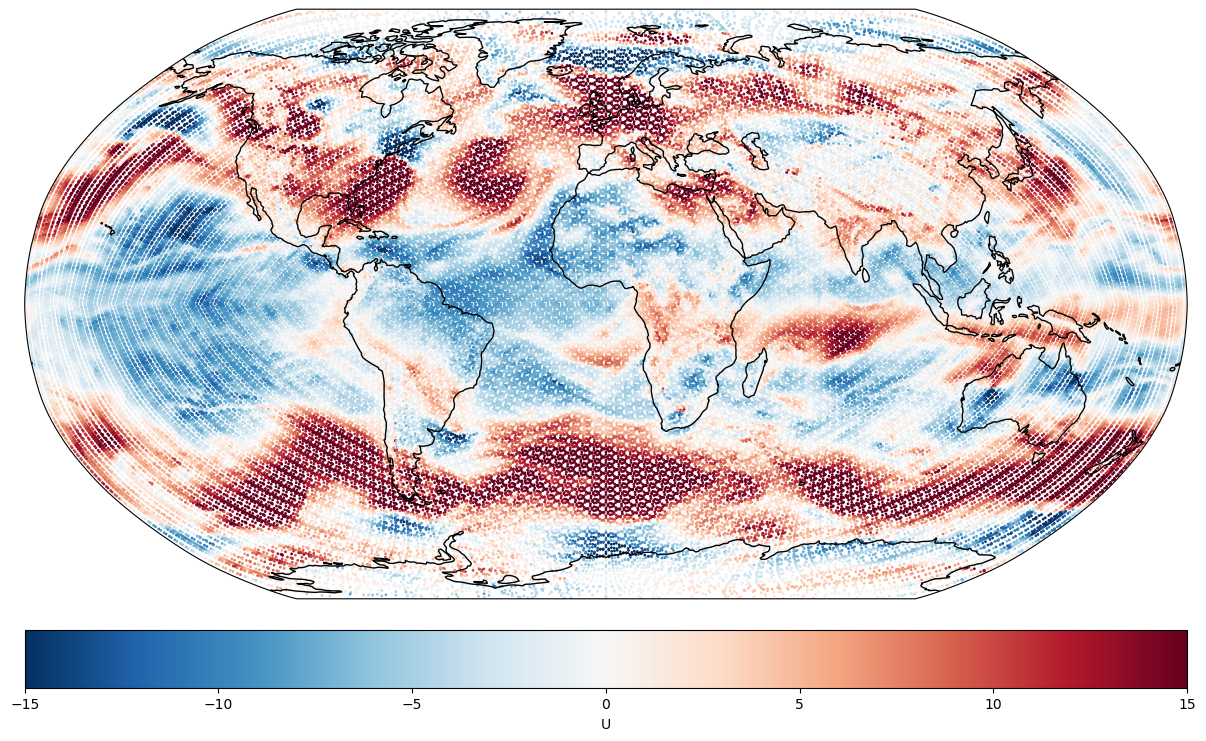

In [46]:
# sstep controls the spacing between points to plot
sstep=64

# plot using the simple scatter method:
plt.figure(figsize=(15,10))
# plot using Robinson projection.
#ax = plt.axes(projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m', color='k')

sc=ax.scatter(data_sample.lon[::sstep], data_sample.lat[::sstep], s=1 , c=data_sample[::sstep],cmap=cm.RdBu_r, transform=ccrs.PlateCarree(), vmin=-15,vmax=15)
# Add colorbar
cbar=plt.colorbar(sc,orientation='horizontal', pad=0.04)
cbar.set_label(r'U')
#plt.clim(-20, 29.) 

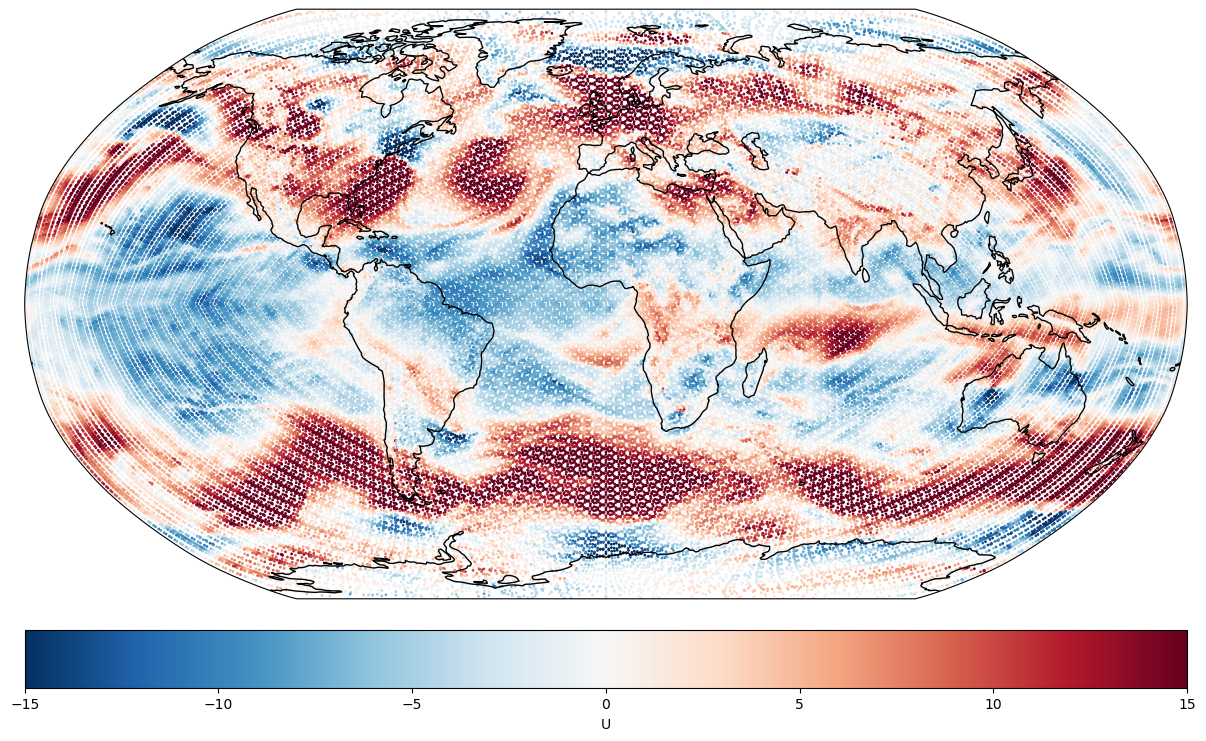

In [47]:
# plot using the simple scatter method:
plt.figure(figsize=(15,10))
# plot using Robinson projection.
#ax = plt.axes(projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m', color='k')

sc=ax.scatter(dataconc_sample.lon[::sstep], dataconc_sample.lat[::sstep], s=1 , c=dataconc_sample[::sstep],cmap=cm.RdBu_r, transform=ccrs.PlateCarree(), vmin=-15,vmax=15)
# Add colorbar
cbar=plt.colorbar(sc,orientation='horizontal', pad=0.04)
cbar.set_label(r'U')
#plt.clim(-20, 29.) 

And check difference between the maps

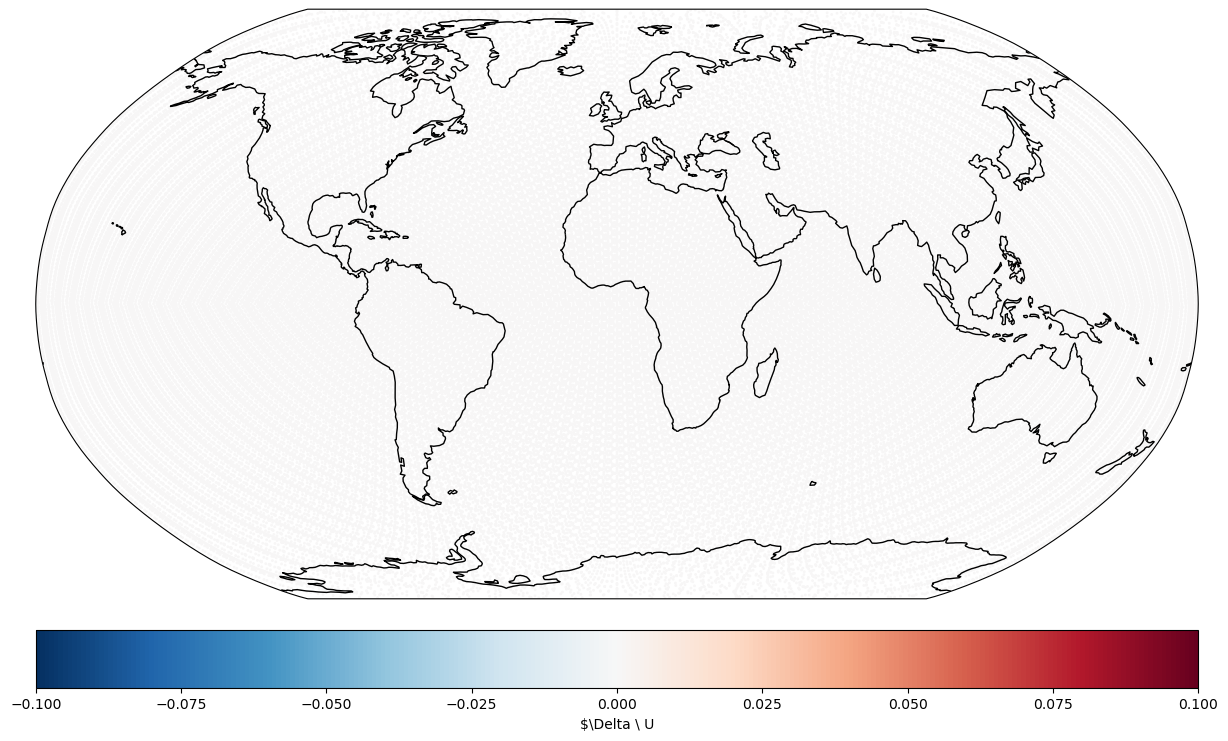

In [48]:
# sstep controls the spacing between points to plot
sstep=64

# plot using the simple scatter method:
plt.figure(figsize=(15,10))
# plot using Robinson projection.
#ax = plt.axes(projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m', color='k')

sc=ax.scatter(data_sample.lon[::sstep], data_sample.lat[::sstep], s=1 , c=data_sample[::sstep]-dataconc_sample[::sstep],cmap=cm.RdBu_r, transform=ccrs.PlateCarree(), vmin=-00.1,vmax=00.1)
# Add colorbar
cbar=plt.colorbar(sc,orientation='horizontal', pad=0.04)
cbar.set_label(r'$\Delta \ U')
#plt.clim(-20, 29.) 

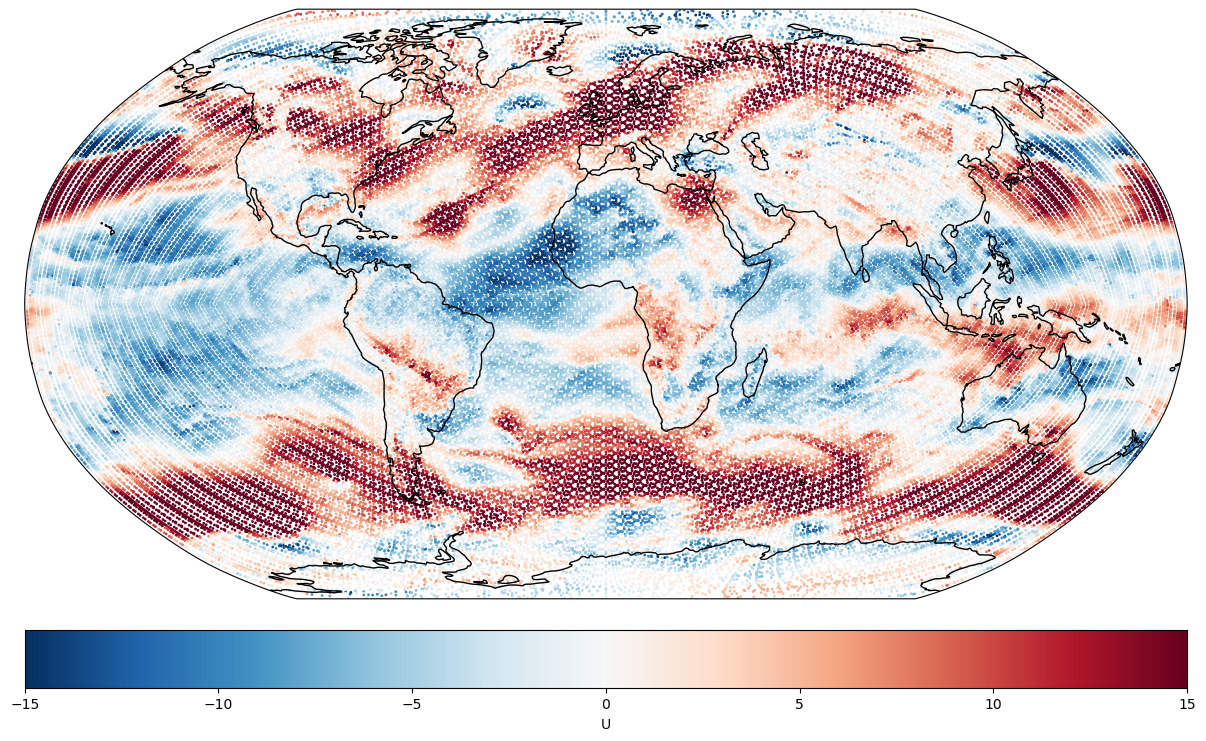

In [49]:
# and a map of nemo -no deep is, without ref to comapre against:
# plot using the simple scatter method:
plt.figure(figsize=(15,10))
# plot using Robinson projection.
#ax = plt.axes(projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m', color='k')

sc=ax.scatter(data_nodeep_sample.lon[::sstep], data_nodeep_sample.lat[::sstep], s=1 , c=data_nodeep_sample[::sstep],cmap=cm.RdBu_r, transform=ccrs.PlateCarree(), vmin=-15,vmax=15)
# Add colorbar
cbar=plt.colorbar(sc,orientation='horizontal', pad=0.04)
cbar.set_label(r'U')
#plt.clim(-20, 29.) 